In [3]:
import matplotlib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from IPython.display import display, Markdown
import time_series as ts

# Reload when the code changes
%load_ext autoreload
%autoreload 2


In [4]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


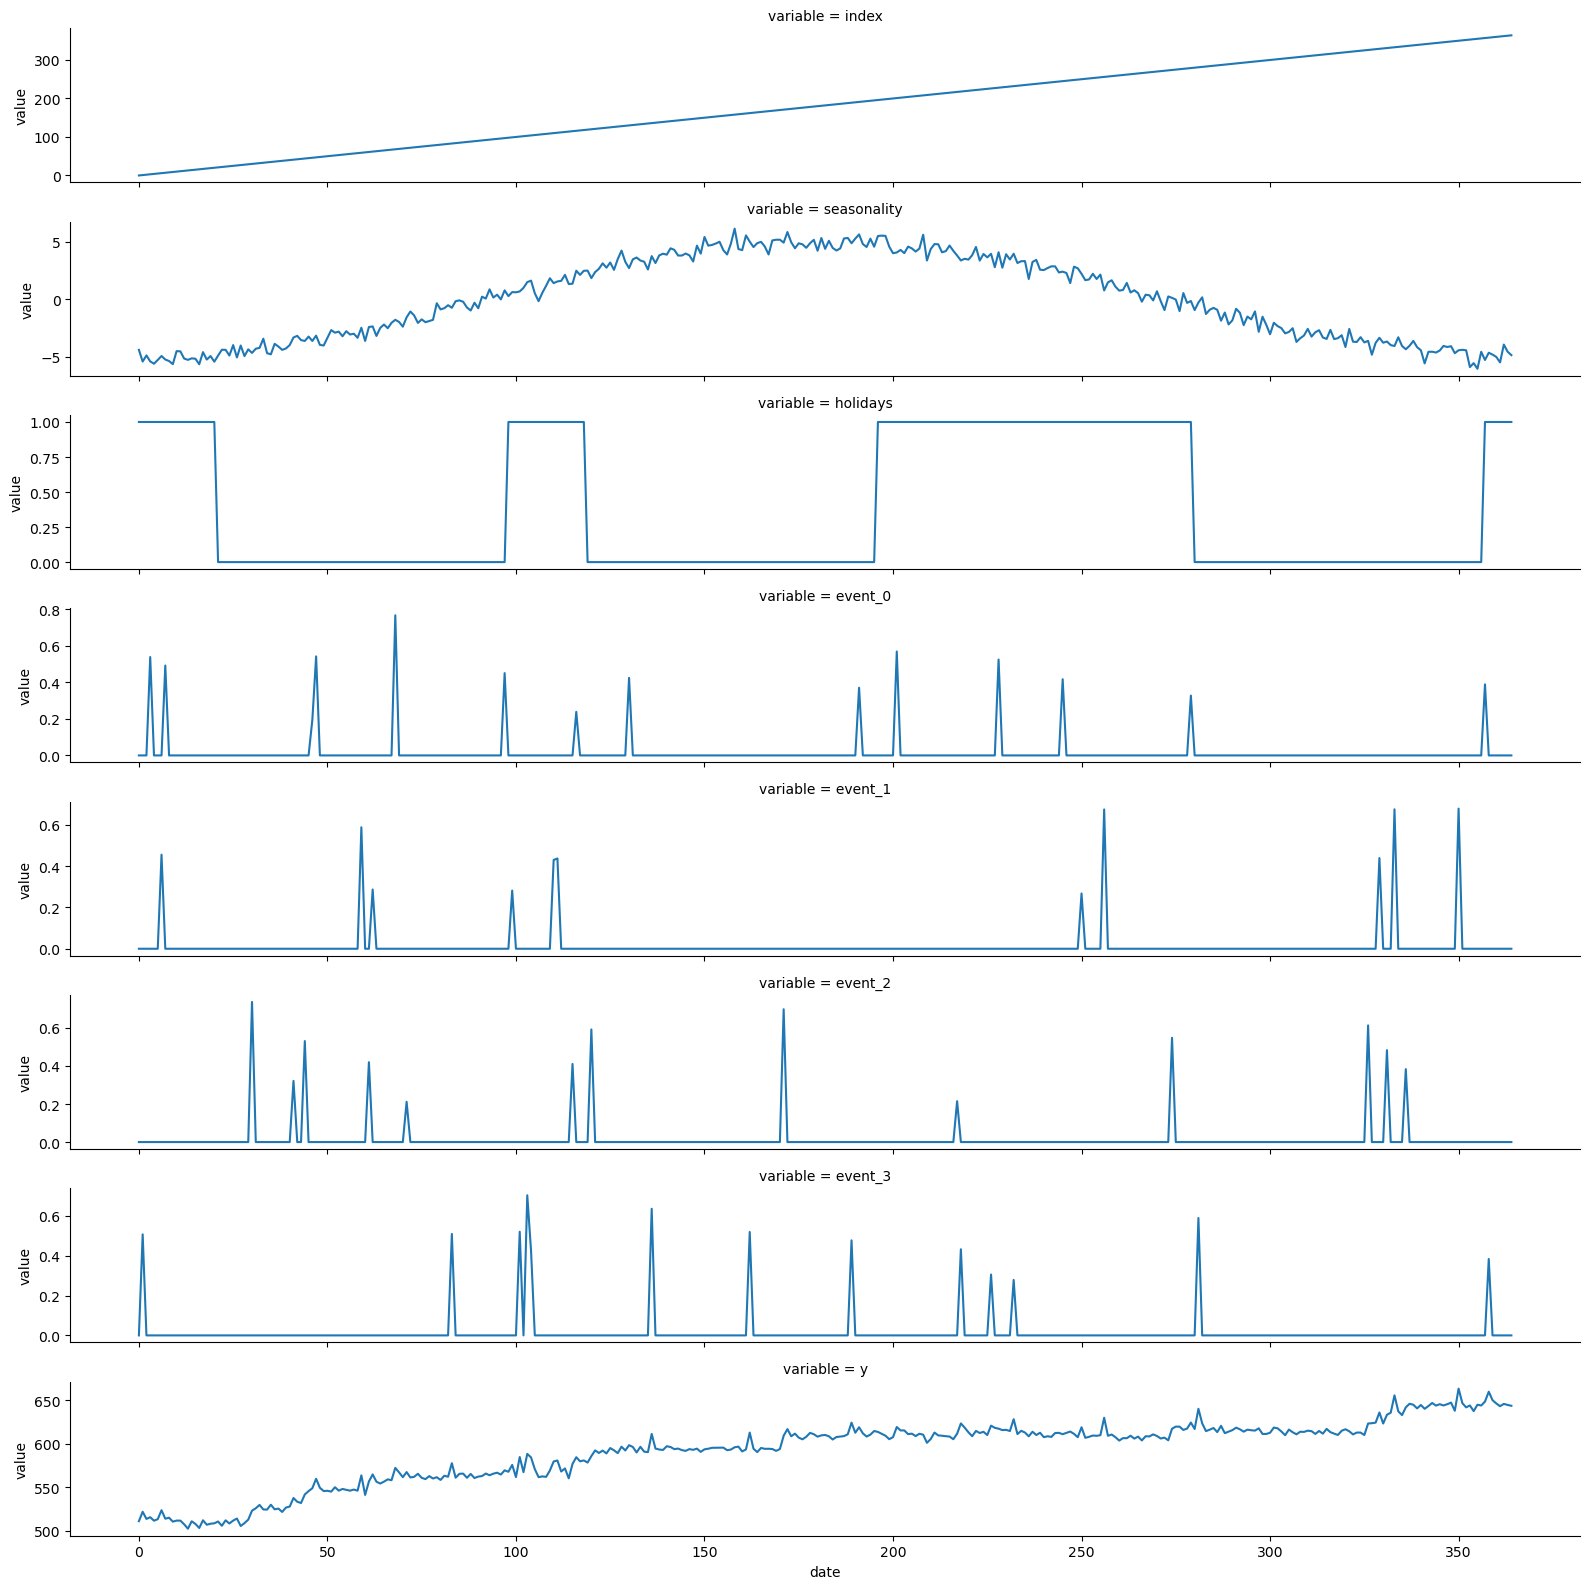

In [26]:
# Get json from url
import requests
import json
import pandas as pd
import seaborn as sns

url = "https://simsets-118f49ff0b32.herokuapp.com/timeseries"
response = requests.get(url)
response_json = response.json()
# Convert json string to dictionary
response_json = json.loads(response_json['observed'])
model_set = pd.DataFrame(response_json)
for_stacking = model_set.reset_index()
for_stacking = for_stacking.stack().reset_index()
for_stacking.columns = ['date', 'variable', 'value']

_ = sns.relplot(
    data=for_stacking,
    x="date", y="value", row="variable",
    kind="line", 
    height=2, aspect=8, facet_kws=dict(sharey=False),
)


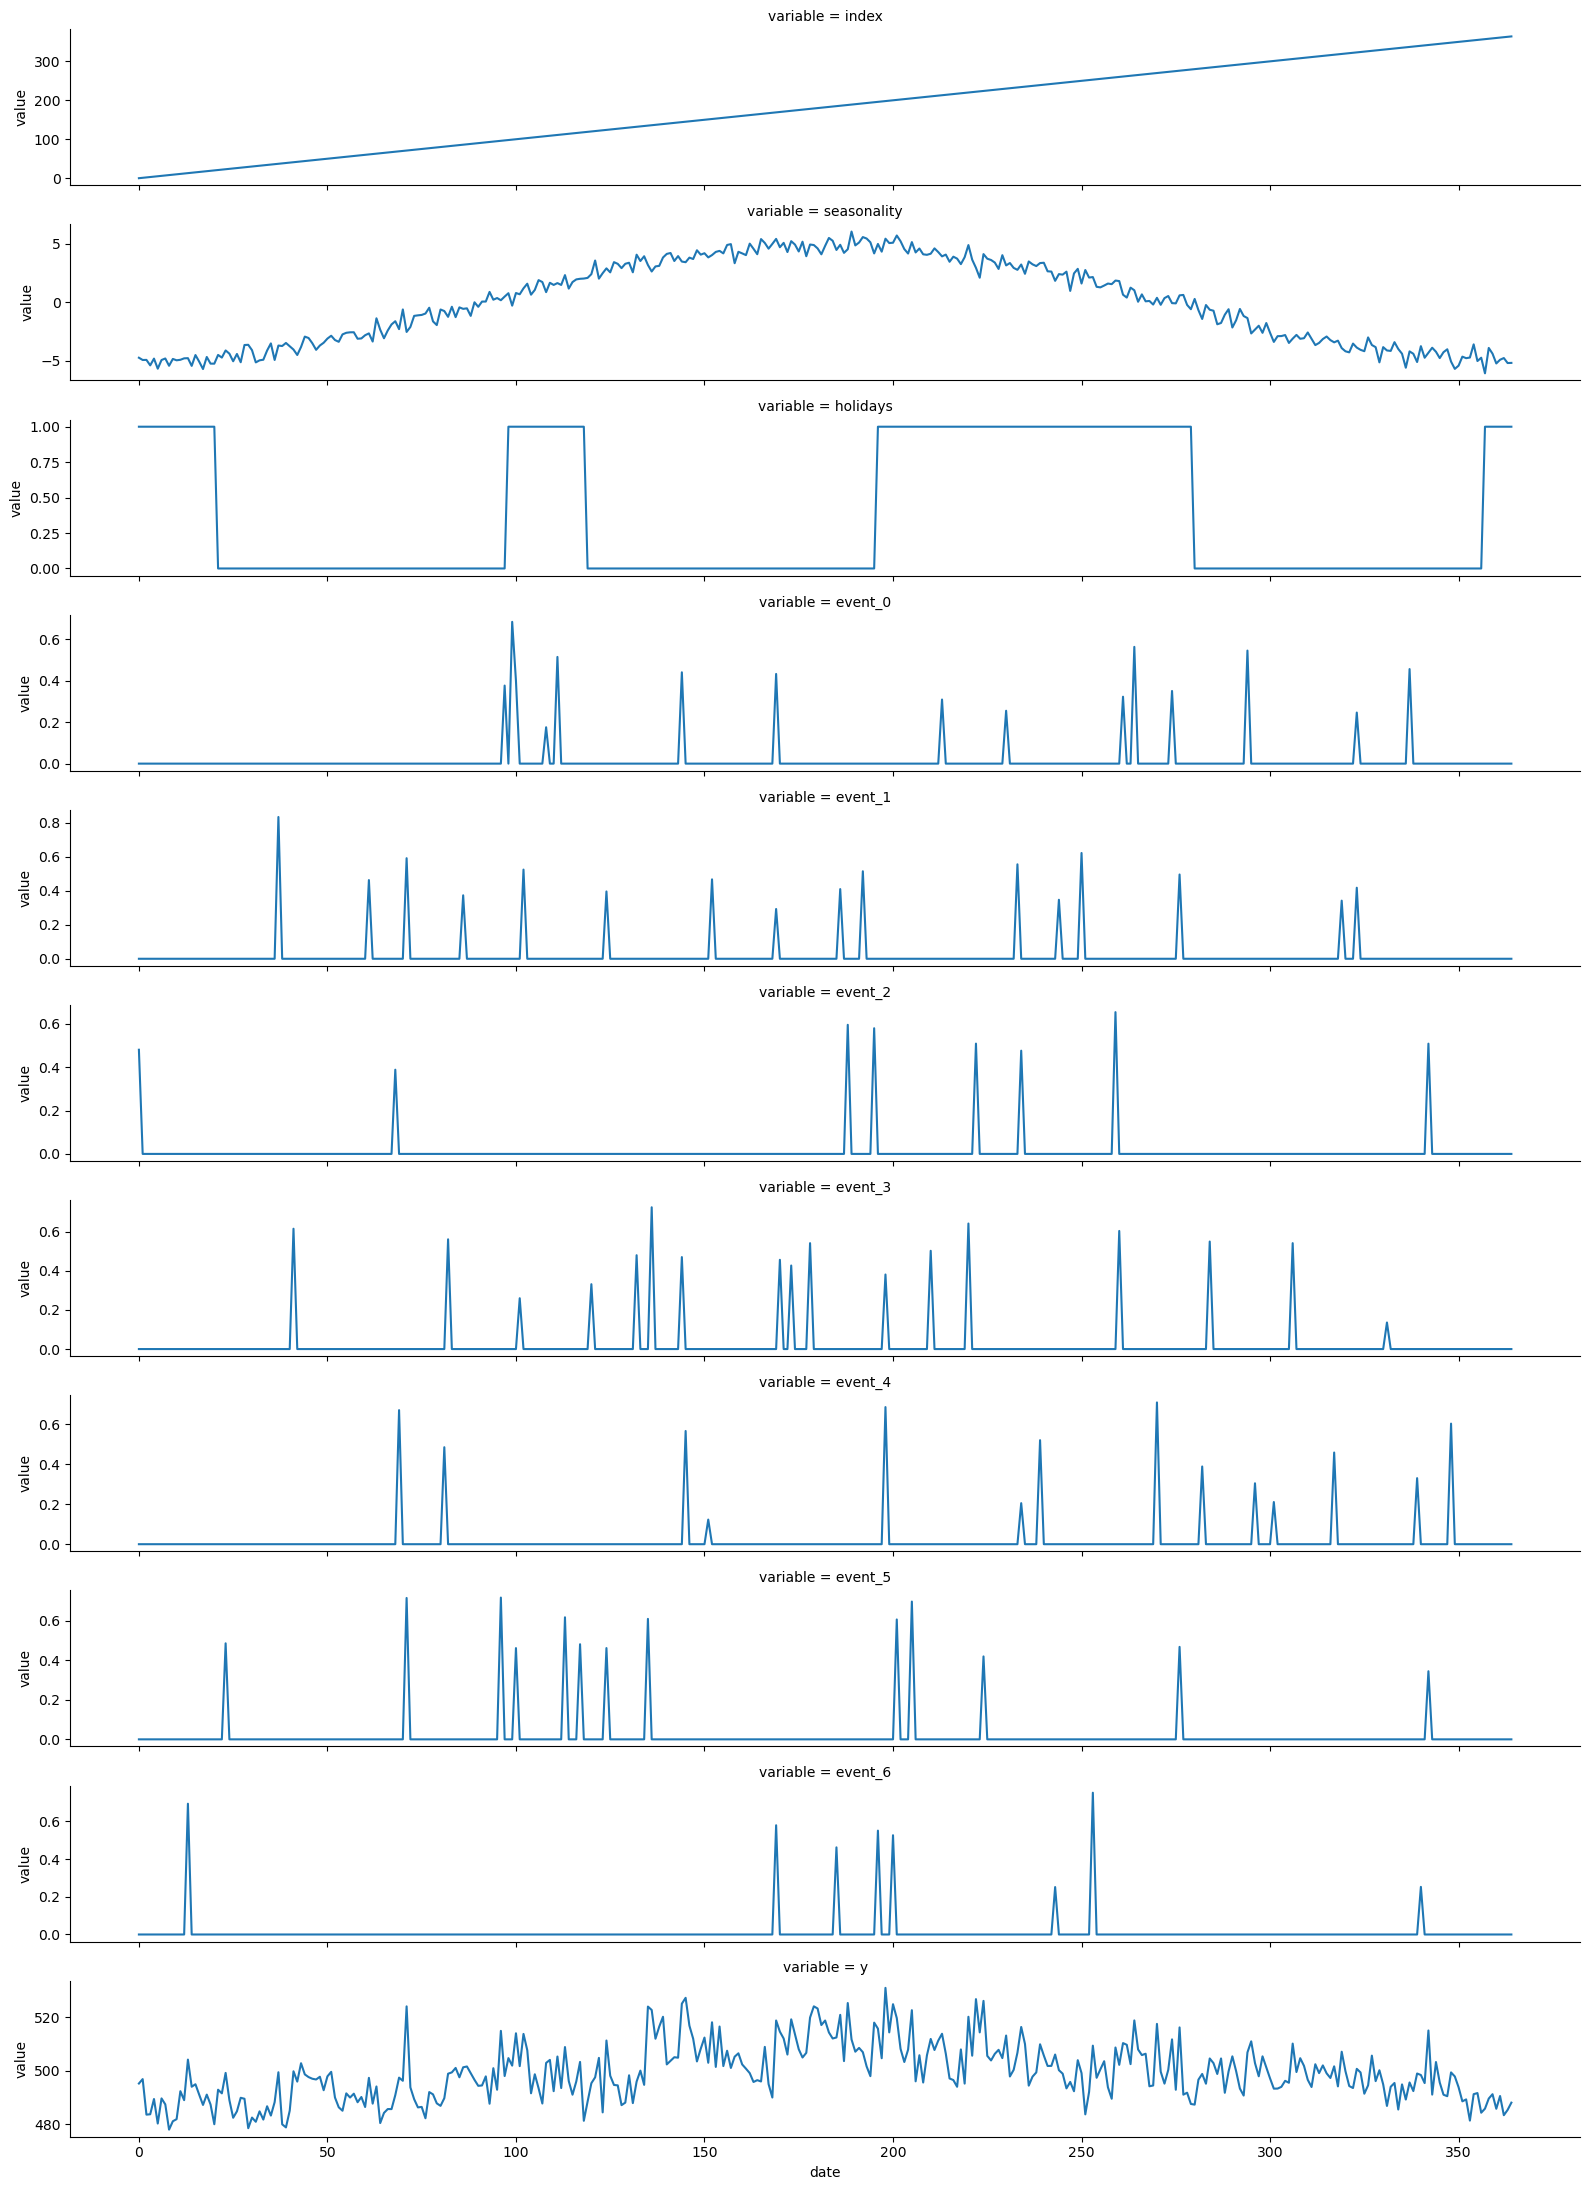

In [20]:

#model_set['date'] = pd.to_datetime(model_set['date'])

for_stacking = model_set.reset_index()
for_stacking = for_stacking.stack().reset_index()
for_stacking.columns = ['date', 'variable', 'value']

_ = sns.relplot(
    data=for_stacking,
    x="date", y="value", row="variable",
    kind="line", 
    height=2, aspect=8, facet_kws=dict(sharey=False),
)

In [13]:

model_set

,seasonality,holidays,event_0,event_1,event_2,event_3,event_4,event_5,event_6,event_7,y
0,-5.296067,1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,467.448751
1,-5.434054,1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,384.834995
2,-4.664142,1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.33504,0.0,318.863943
3,-4.247703,1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,237.673537
4,-4.598425,1,0.0,0.000000,0.0,0.0,0.0,0.218086,0.00000,0.0,169.076485
...,...,...,...,...,...,...,...,...,...,...,...
360,-4.833596,1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,-27401.621983
361,-5.046941,1,0.0,0.359783,0.0,0.0,0.0,0.000000,0.00000,0.0,-27465.047247
362,-5.964027,1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,-27556.664546
363,-4.254665,1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,-27635.216032


In [ ]:
model_set['date'] = pd.to_datetime(model_set['date'])

for_stacking = model_set.set_index('date')
for_stacking = for_stacking.stack().reset_index()
for_stacking.columns = ['date', 'variable', 'value']

_ = sns.relplot(
    data=for_stacking,
    x="date", y="value", row="variable",
    kind="line", 
    height=2, aspect=8, facet_kws=dict(sharey=False),
)

In [4]:

# Instantiate a Trend object
intercept = ts.Intercept("intercept", (500, 50))
trend = ts.Trend("trend", (0, 500), "quadratic")
seasonality = ts.Seasonality("seasonality", (0, 1), 1)
event_1 = ts.Event("event_1", 1, (20, 5), 15.0,  (0.5, 0.5))
event_2 = ts.Event("event_2", 2, (30, 5), 3.5,  (5, 1))
event_3 = ts.Event("event_3", 2, (10, 1), 40.5, (10, 1))
holidays = ts.Holidays("holidays", (0, 10))
noise = ts.Noise("noise", (9, 0.5), 1, 1)
sim_ts = ts.SimulatedTimeSeries([intercept, trend, seasonality, holidays, event_1, event_2, event_3, noise])
contributions, observed, latex = sim_ts.generate_time_series(1095)
display(Markdown(latex))



$y_t =  528.13  + 0.0780t^2 \times 10^{-4}  + 0.04 s_t  -2.62 h_t  + 15.64 v_{1, t}  + 34.16 v_{2, t}  + 11.39 v_{2, t}  + \epsilon_t $

 Where: 

 $t = 0, 1, 2 \ldots, n$ 

 $v_{1, t} = e_{1, t} + 0.10 v_{1, t-1}$ 

 $v_{2, t} = e_{2, t} + 0.83 v_{2, t-1}$ 

 $v_{2, t} = e_{2, t} + 1.00 v_{2, t-1}$ 

 $\epsilon_t \sim N(0, 6.18^2)$ 

In [21]:
import markdown
from mdx_math import MathExtension

# Create Markdown instance with math extension
md = markdown.Markdown(extensions=['mdx_math'],
                       extension_configs={
                           'mdx_math': {'enable_dollar_delimiter': True}
                       })
markdown_text = "$y_t =  522.63  -0.0965t^2 \\times 10^{-4}  + 0.90 s_t  + 7.61 h_t  + 25.50 v_{1, t}  + 24.28 v_{2, t}  + 10.95 v_{2, t}  + \\epsilon_t $\n\n Where: \n\n $t = 0, 1, 2 \\ldots, n$ \n\n $v_{1, t} = e_{1, t} + 0.85 v_{1, t-1}$ \n\n $v_{2, t} = e_{2, t} + 0.89 v_{2, t-1}$ \n\n $v_{2, t} = e_{2, t} + 0.95 v_{2, t-1}$ \n\n $\\epsilon_t \\sim N(0, 3.04^2)$"
html = md.convert(markdown_text)

# Save the html to a file
with open("time_series_equation.html", "w") as f:
    f.write(html)

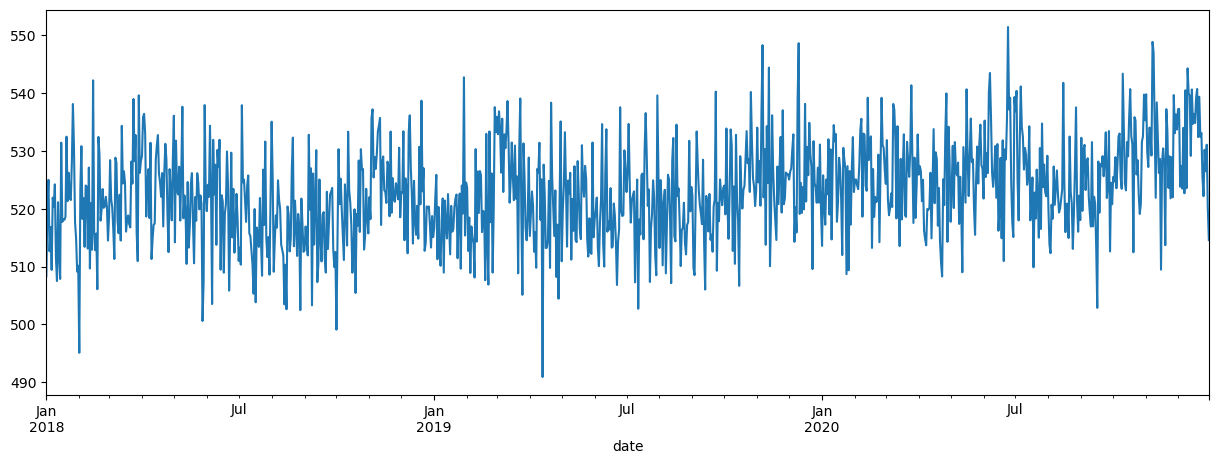

In [26]:
# Set the figure size
plt.figure(figsize=(15, 5))
_ = observed['y'].plot()

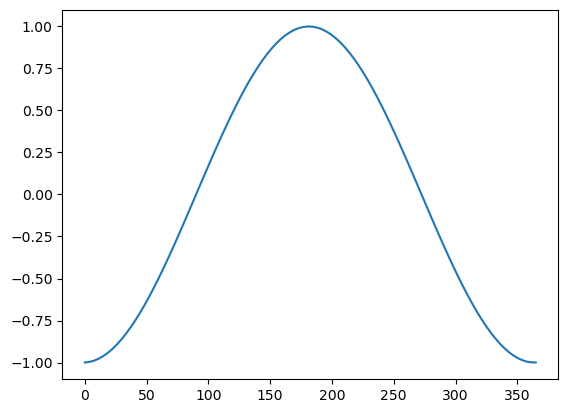

In [223]:
# Plot the sine function using matplotlib

x = np.linspace(0, 365, 100)
y = np.sin((x-90)*2*np.pi/365)
plt.plot(x, y)
plt.show()


In [ ]:

ff = trend.generate_trend()

# Change figure size
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

# Plot the functional form against 
import pandas as pd
ff = pd.Series(ff)
ff.plot()


In [2]:
trend.describe()

{'name': 'trend',
 'length': 1095,
 'coefficient': 5061.924612033297,
 'functional_form': 'log',
 'trend_shape': array([0.        , 0.00167895, 0.00334876, ..., 0.9991941 , 0.99959721,
        1.        ]),
 'num_breaks': 1,
 'latex': '$trend = 5061.924612033297 \\times log$'}

In [1]:
import video_games as vg
vg.read_video_games()

[{'searches': 2265.060696329366,
  'date': '2018-01-01',
  'temp': 1.9185564594528834,
  'holidays': 1,
  'big_game_release': 0,
  'comic_con': 0,
  'console_release': 0},
 {'searches': 1508.854747056647,
  'date': '2018-01-02',
  'temp': -4.0259156920418135,
  'holidays': 1,
  'big_game_release': 0,
  'comic_con': 0,
  'console_release': 0},
 {'searches': 2324.375989180606,
  'date': '2018-01-03',
  'temp': 2.7962439222112927,
  'holidays': 1,
  'big_game_release': 0,
  'comic_con': 0,
  'console_release': 0},
 {'searches': 1826.4084802584123,
  'date': '2018-01-04',
  'temp': -3.867996159290543,
  'holidays': 1,
  'big_game_release': 0,
  'comic_con': 0,
  'console_release': 0},
 {'searches': 2503.9015189589945,
  'date': '2018-01-05',
  'temp': 2.3235108824292725,
  'holidays': 1,
  'big_game_release': 0,
  'comic_con': 0,
  'console_release': 0},
 {'searches': 1699.3713383594338,
  'date': '2018-01-06',
  'temp': -2.9034682527452205,
  'holidays': 1,
  'big_game_release': 0,
  'com

In [8]:
import pandas as pd
date_index = pd.date_range("2018-01-01", periods=10, freq="D")

# Extract the dates into a list with the format "YYYY-MM-DD"
dates = [date.strftime("%Y-%m-%d") for date in date_index]
dates

['2018-01-01',
 '2018-01-02',
 '2018-01-03',
 '2018-01-04',
 '2018-01-05',
 '2018-01-06',
 '2018-01-07',
 '2018-01-08',
 '2018-01-09',
 '2018-01-10']